In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [60]:
def van_der_pool(x, u, d, step_time):
    dot_x = [0,0]
    dot_x[0] = x[1]
    dot_x[1] = -2.0*x[0] + 3.0*x[1]*(1.0 - np.power(x[0], 2.0)) + u + d
    #print('x=', x)
    #print('dot_x=', dot_x)
    return  [xi + step_time*dot_xi for xi, dot_xi in zip(x,dot_x)] 

In [61]:
def fraction_power_approximation(value, delta, kappa, gamma):
    return (1-delta)*kappa*np.tanh(gamma*value) + delta*value

In [62]:
def dot_fraction_power_approximation(value, dot_value, delta, kappa, gamma):
    return ((1-delta)*kappa*gamma*np.power((1.0/np.cosh(gamma*value)),2.0) + delta)*dot_value

In [63]:
def reference(time, omega):
    reference = np.zeros(shape=(3,1))    
    reference[0,0] = np.cos(omega*np.pi*time)
    reference[1,0] = -omega*np.pi*np.sin(omega*np.pi*time)
    reference[2,0] = -omega*np.pi*omega*np.pi*np.cos(omega*np.pi*time)    
    return reference

In [64]:
def plot (data, total_time, save_pdf = False):
    #fig = plt.figure(figsize=(100, 100), dpi= 100)
    # Set font sizes
    plt.rc('font', size=12)          # controls default text sizes
    plt.rc('axes', titlesize=10)     # fontsize of the axes title
    plt.rc('axes', labelsize=10)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
    plt.rc('legend', fontsize=10)    # legend fontsize

    fig = plt.figure()
    ax = fig.add_subplot(211)
    ax.plot(data[0,:], data[1,:],linewidth=1, color='r', label=r'$x_1(t)$')    
    ax.plot(data[0,:], data[8,:],linewidth=1, linestyle='--', color='k', label=r'$x_{1_c}(t)$') 
    ax.plot(data[0,:], data[10,:],linewidth=1, color='b', label=r'$x_{1_r}(t)$')   
    ax.grid()
    ax.set_xlim((0.0, total_time))
    ax.set_xlabel('Time')
    ax.set_ylabel(r'$x_1(t)$')
    ax.set_title('First state')
    ax.legend(loc='upper right')

    ax = fig.add_subplot(212)
    ax.plot(data[0,:], data[2,:],linewidth=1, color='r', label=r'$x_2(t)$') 
    ax.plot(data[0,:], data[9,:],linewidth=1, linestyle='--', color='k', label=r'$x_{2_c}(t)$')    
    ax.plot(data[0,:], data[11,:],linewidth=1, color='b', label=r'$x_{2_r}(t)$')   
    ax.grid()
    ax.set_xlim((0.0, total_time))
    ax.set_xlabel('Time')
    ax.set_ylabel(r'$x_2(t)$')
    ax.set_title('Second state')
    ax.legend(loc='upper right')

    plt.tight_layout()
    if save_pdf:
        fig.savefig('MANUSCRIPT_ELSEVIER/GRAPHICS/van_der_pool_states.pdf', format='pdf', bbox_inches='tight')

    fig = plt.figure()
    ax = fig.add_subplot(311)
    ax.plot(data[0,:], data[13,:],linewidth=1, color='r', label=r'$e_1(t)$')
    ax.grid()
    ax.set_xlim((0.0, total_time))
    ax.set_xlabel('Time')
    ax.set_ylabel(r'$e_1(t)$')
    ax.set_title('Tracking error')
    ax.legend(loc='upper right')
    ax = fig.add_subplot(312)
    ax.plot(data[0,:], data[7,:],linewidth=1, color='r', label=r'$z(t)$')
    ax.grid()
    ax.set_xlim((0.0, total_time))
    ax.set_xlabel('Time')
    ax.set_ylabel(r'$z(t)$')
    ax.set_title('Nominal error')
    ax.legend(loc='upper right')
    ax = fig.add_subplot(313)
    ax.plot(data[0,:], data[6,:],linewidth=1, color='r', label=r'$s(t)$')
    ax.grid()
    ax.set_xlim((0.0, total_time))
    ax.set_xlabel('Time')
    ax.set_ylabel(r'$s(t)$')
    ax.set_title('Sliding variable')
    ax.legend(loc='upper right')
    plt.tight_layout()
    if save_pdf:
        fig.savefig('MANUSCRIPT_ELSEVIER/GRAPHICS/van_der_pool_errors.pdf', format='pdf', bbox_inches='tight')

    fig = plt.figure()
    ax = fig.add_subplot(211)
    ax.plot(data[0,:], data[3,:],linewidth=1, color='r', label=r'$u(t)$')
    ax.grid()
    ax.set_xlim((0.0, total_time))
    ax.set_xlabel('Time')
    ax.set_ylabel(r'$u(t)$')
    ax.set_title('Control')
    ax.legend(loc='upper right')
    ax = fig.add_subplot(212)
    ax.plot(data[0,:], data[4,:],linewidth=1, color='r', label=r'$d(t)$')
    ax.plot(data[0,:], data[5,:],linewidth=1, color='b', label=r'$\hat{d}(t)$')
    ax.grid()
    ax.set_xlim((0.0, total_time))
    ax.set_xlabel('Time')
    ax.set_ylabel(r'$d, \hat{d}$')
    ax.set_title('Disturbance and estimation')
    ax.legend(loc='upper right')
    plt.tight_layout()
    if save_pdf:
        fig.savefig('MANUSCRIPT_ELSEVIER/GRAPHICS/van_der_pool_control_disturbance.pdf', format='pdf', bbox_inches='tight')
    '''
    ax = fig.add_subplot(313)
    ax.plot(data[0,:], data[14,:],linewidth=1, color='r', label=r'$V(t)$')
    ax.grid()
    ax.set_xlim((0.0, total_time))
    ax.set_xlabel('Time')
    ax.set_ylabel(r'$V(t)$')
    ax.set_title('Lyapunov')
    ax.legend()
    plt.tight_layout()
    '''
    plt.show()

In [65]:
def simulate(total_steps, step_time, x, parameters):
    time = 0.0
    data = np.zeros(shape=(15, total_steps))
    control_state = np.zeros(shape=(3, 1))
    for step in range(total_steps):
        reference_state = reference(time, parameters['r_freq'])
        #print('reference_state=', list(reference_state.flatten()) )
        u, hat_d, s, z_1, x_1_c, x_2_c, e_1, c_e, c_w = control(x, time, reference_state, control_state, parameters)
        d = disturbance(x, time, parameters['d_freq'], parameters['d_type'])
    
        V = 0.5*(np.power(s, 2.0) + c_e*np.power(e_1, 2.0) +  c_w*np.power(hat_d, 2.0))
        #print('V=', V)
        data[:, step] = [time] + x + [u, d, hat_d, s, z_1, x_1_c, x_2_c] + list(reference_state.flatten()) + [e_1, V]
        x = van_der_pool(x, u, d, step_time)
        #print('time=', time, ' e_1=', e_1)
        time += step_time
        #if step % 100:
        #    print('step=',step, ' time=',time)
    return data

In [66]:
def control(x, time, reference, control_state, parameters):
    
    delta = 0.2768
    t_s = parameters['t_s']
    step_time = parameters['step_time']
    dot_d_max = parameters['dot_d_max']
    e_min = parameters['e_min']
    s_min = parameters['s_min']
    w_min = parameters['w_min']
    d_0 = parameters['d_0']
    z_min = parameters['z_min']
    z_lim = parameters['z_lim']
    mu = parameters['mu']
    kappa_z = parameters['kappa_z']#mu / 2.0
    tau_inv = 1.0/step_time

    #########################################################
    ############   Nominal fixed-time tracking   ############
    #########################################################
    #kappa_z = mu
    gamma_z = np.arctanh(1.0/kappa_z)/z_min
    p = 1 - (1.0/mu)
    q = 1 + (1.0/mu)
    bar_p = 2.0*p - 1.0
    bar_q = 2.0*q - 1.0  
    a = np.pi*mu / (2.0*t_s*np.sqrt(np.power(2.0, q-p)*np.power(z_lim, 2.0*(p-q))))
    b = a*np.power(2.0, q-p)*np.power(z_lim, 2.0*(p-q))
    alfa_z = a / np.power(2.0,p)
    beta_z = b / np.power(2.0,q)
    x_1_r = reference[0,0]
    x_2_r = reference[1,0]
    dot_x_2_r = reference[2,0]
    if time < step_time:
        x_1_c = x[0]
    else:
        x_1_c = control_state[0,0]
    z_1 = x_1_c - x_1_r
    Lambda_z_1 = alfa_z*fraction_power_approximation(z_1, bar_p, kappa_z, gamma_z) + beta_z*np.power(np.abs(z_1),bar_q)*np.sign(z_1) 
    x_2_c = x_2_r - Lambda_z_1
    z_2 = x_2_c - x_2_r
    dot_Lambda_z_1 = alfa_z*dot_fraction_power_approximation(z_1, z_2, bar_p, kappa_z, gamma_z) + beta_z*bar_q*(np.power(np.abs(z_1),(bar_q-1))*np.sign(z_1))*z_2    
    dx_2_c = dot_x_2_r - dot_Lambda_z_1
    
    #########################################################
    ############  Tracking of nominal trayectory ############
    #########################################################
    x_1 = x[0]
    x_2 = x[1]
    e_1 = x_1 - x_1_c
    e_2 = x_2 - x_2_c

    c_e = 1.0/(delta)    
    c_w = 1.0/tau_inv
    if time < 0.5*step_time:
        V_0 = 0.5*(np.power(e_2, 2.0) + c_w*np.power(d_0, 2.0))
        V_min = 0.5*(np.power(s_min, 2.0) + c_e*np.power(e_min, 2.0) +  c_w*np.power(w_min, 2.0))
        alfa = np.abs(np.log(V_min/V_0)/t_s)
        parameters['alfa'] = alfa
        #print('V_min=', V_min , ' V_0=', V_0, 'd_0=', d_0, ' alfa=', alfa, ' gamma_z=', gamma_z)
    else:
        alfa = parameters['alfa']    
    kappa_e = c_w*np.power(dot_d_max, 2.0)/(2.0*e_min*c_e)
    alfa_s = (alfa+c_e+c_w)/2 
    alfa_e = (alfa+1)/2
    alfa_w = (c_w*(alfa+1)+1)/(2.0*c_w)
    gamma_e = alfa_e / kappa_e
    kappa_s = (2.0*delta*c_e*kappa_e) / (gamma_e*s_min)
    gamma_s = 2.0*delta/s_min
    #print('*************************************************************')
    #print('alfa_w=', alfa_w, ' alfa_e=', alfa_e, ' alfa_s=', alfa_s, ' alfa=', alfa, ' alfa_z=', alfa_z)
    #print('e_1=', e_1 , ' c_w=',c_w, ' gamma_s=', gamma_s, ' kappa_e=', kappa_e, ' kappa_s=', kappa_s)  
    #print('gamma_e=', gamma_e, ' gamma_s=', gamma_s)
    Lambda_e_1 = alfa_e*e_1 + kappa_e*np.tanh(gamma_e*e_1)
    dot_Lambda_e_1 = alfa_e*e_2 + kappa_e*gamma_e*(np.power((1.0/np.cosh(gamma_e*e_1)),2.0))*e_2
    s = e_2 + Lambda_e_1
    if time < 0.5*step_time:
        phi_s = -alfa_w*s
    else:
        phi_s = control_state[1,0]
    Lambda_s = alfa_s*s + kappa_s*np.tanh(gamma_s*s)
    dot_phi_s = alfa_w*Lambda_s    
    hat_d = alfa_w*s + phi_s
    f = -2.0*x_1 + 3.0*x_2*(1.0 - np.power(x_1, 2.0))
    g = 1.0
    control = (1.0/g)*(dx_2_c - f - dot_Lambda_e_1 - Lambda_s - hat_d)
    x_1_c_new = x_1_c + step_time*x_2_c
    phi_s_new = phi_s + step_time*dot_phi_s
    control_state[0,0] = x_1_c_new
    control_state[1,0] = phi_s_new
    return control, hat_d, s, z_1, x_1_c, x_2_c, e_1, c_e, c_w

In [67]:
def compute_settling_time(state, reference, time_data, e_min):
    settling_time_indices = np.where(np.abs(state - reference) <= e_min)[0]
    indices_diff =  np.where(np.abs(np.diff(settling_time_indices)) > 2)[0]
    if indices_diff.size > 0:
        last_index = indices_diff[-1]
        settling_time_indices = settling_time_indices[last_index+1:]
    #print('settling_time_indices=', settling_time_indices)

    if settling_time_indices.size > 0:
        settling_time = time_data[settling_time_indices[0]]
    else:
        settling_time = None
    return settling_time

In [68]:

# State bounds
x1_max = 20.0
x2_max = 10.0
x1_min = 3.0
x2_min = 0.0

# Disturbance bounds
D0_max = 100.0
D0_min = 10.0
DELTA_max = 15.0
DELTA_min = 5.0

d_freq_max = 15.0
d_freq_min = 3.0


r_freq_max = 5.0
r_freq_min = 1.0

# Settling times
settling_times = [1.0, 3.0, 6.0, 9.0]

# Number of examples per settling time
num_examples = 500
ts_times_data = {}

if False:
    for ts in settling_times:    
        ts_key = str(ts)
        ts_times_data[ts_key] = np.zeros(shape=(num_examples, 5))
        total_time = ts + 2.0
        total_steps = int(total_time*500)
        step_time = total_time / total_steps
        print('------------------------------ ts=', ts, ' step_time=', step_time, ' -----------------------------------------')
        for i in range(num_examples):
            x = [np.random.choice([np.random.uniform(-x1_max, -x1_min), np.random.uniform(x1_min, x1_max)]) , np.random.uniform(-x2_max, x2_max)]
            norm_x = np.linalg.norm(x)
            dot_d_max = np.random.uniform(DELTA_min, DELTA_max)
            d_0 = np.random.uniform(D0_min, D0_max)
            d_freq = np.random.uniform(d_freq_min, d_freq_max)
            r_freq = np.random.uniform(r_freq_max, r_freq_min)
            d_type = np.random.randint(0,3)

            #parameters = {'t_s': ts, 'step_time': step_time,  'dot_d_max': dot_d_max, 'e_min': 0.05, 's_min': 0.2, 'w_min': 0.8, 'd_0':d_0}
            parameters = {'t_s': ts, 'step_time': step_time,  'dot_d_max': dot_d_max, 
                'e_min': 0.05, 's_min': 0.05, 'w_min': 0.05, 'd_0':d_0,
                'z_min': 0.25, 'z_lim': 1.0, 'mu': 2.1, 
                'd_freq': d_freq, 'd_type': d_type, 'r_freq':r_freq, 'kappa_z': 1.05}

            data = simulate(total_steps, step_time, x, parameters)
            settling_time = compute_settling_time(data[1,:], data[10,:], data[0,:], parameters['e_min'])
            u_max = np.max(np.abs(data[3,:]))
            ts_times_data[ts_key][i,:] = [settling_time, u_max, norm_x, dot_d_max, d_0]
            if i % 10 == 0:
                '''
                    print('i=', i, ' ts=', ts, ' settling_time=', settling_time, 'x=' ,x, 
                      ' dot_d_max=', dot_d_max, ' d_0=', d_0, ' d_freq=', d_freq, ' d_type=', d_type, 
                      ' u_max=', u_max, ' norm_x=', norm_x, ' u_max=', u_max ,' norm_x=', norm_x , 
                      ' u_max/norm_x=', u_max/np.log(norm_x), ' settling_time/norm_x=', settling_time/np.log(norm_x))
                '''
                print('i=', i, ' ts=', ts, ' settling_time=', settling_time,' u_max/norm_x=', u_max/np.log(norm_x), ' settling_time/norm_x=',  settling_time/np.log(norm_x))
            #plot(data, total_time, save_pdf = False)
            #print(ts_times_data[ts])
        #break
        #settling_time_mean = np.mean(ts_times_data[ts_key][:,0])
        #settling_time_var = np.var(ts_times_data[ts_key][:,0])
        #print('ts=', ts, ' settling_time_mean=', settling_time_mean, ' settling_time_var=', settling_time_var)
        #break
    #print(ts_times_data)   

    plt.rc('font', size=12)          # controls default text sizes
    plt.rc('axes', titlesize=10)     # fontsize of the axes title
    plt.rc('axes', labelsize=10)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
    plt.rc('legend', fontsize=10)    # legend fontsize

    fig, axs = plt.subplots(len(settling_times), 1, figsize=(10, 10))
    idx = 0
    for ts in settling_times:
        ts_key = str(ts)    
        #print('ts = ', ts_key, ' data=', ts_times_data[ts_key])
        axs[idx].hist(ts_times_data[ts_key][:,0], alpha = 0.65, density = False)    
        #axs[idx].grid()
        axs[idx].set_title(r'Histogram for settling time $t_s=$' + ts_key)
        axs[idx].set_xlabel('Settling time')
        axs[idx].set_ylabel('Number of examples')
        idx += 1
    plt.tight_layout()
    fig.savefig('MANUSCRIPT_ELSEVIER/GRAPHICS/van_der_pool_ts_histograms.pdf', format='pdf', bbox_inches='tight')


In [69]:
def disturbance(x, time, freq, type):
    #print('x=',x[0])
    if type == 0:
        return 3.0*np.sin(freq*np.pi*time - 0.42)
    elif type == 1:
        return 3.0*np.sin(freq*np.pi*time - 1.2) - 1.5*np.cos(2.0*freq*np.pi*time + 0.98) + 3.5*np.cos(0.75*freq*np.pi*time + 0.05)*np.exp(np.cos(5.75*np.pi*time))
    elif type == 2:
       d = 2.0*np.sin(freq*np.pi*time - 1.2)*x[0] + 0.5*np.power(np.abs(x[1]), 1.2)*np.sign(x[1]) + 2.0*x[0]*x[1] + 2.0*np.exp(-1.2*np.abs(x[0]))*np.cos(2.0*freq*np.pi*time + 0.43)
       #print('d=', d)
       return d

total_steps= 1500  parameters= {'t_s': 1.0, 'step_time': 0.002, 'dot_d_max': 5.0, 'e_min': 0.05, 's_min': 0.05, 'w_min': 0.05, 'd_0': 10.0, 'z_min': 0.25, 'z_lim': 1.0, 'mu': 2.1, 'd_freq': 7.0, 'd_type': 1, 'r_freq': 2.0, 'kappa_z': 1.05, 'alfa': 13.943837050318667}
settling_time= 0.9380000000000007  u_max= 5547.331877716828  norm_x= 12.43360910432973  u_max/norm_x= 2200.9700030299737  settling_time/norm_x= 0.37216267357918165  x= [9.217451704084723, 8.344652146263304]


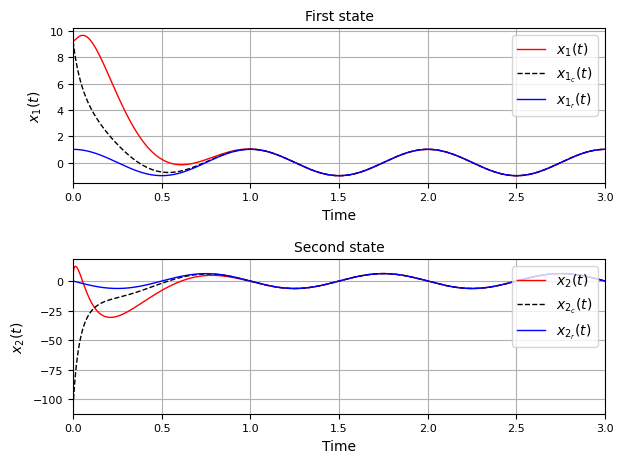

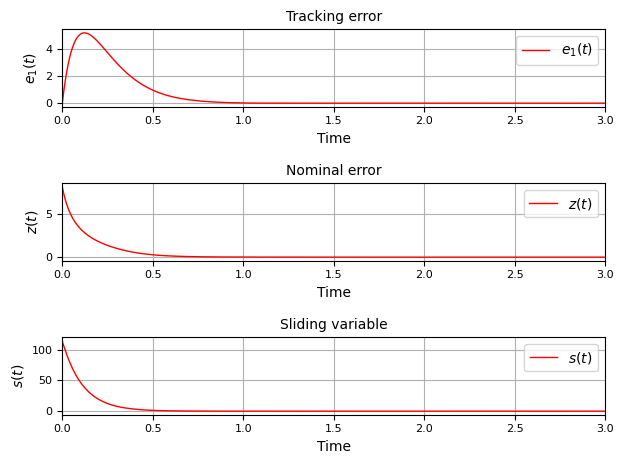

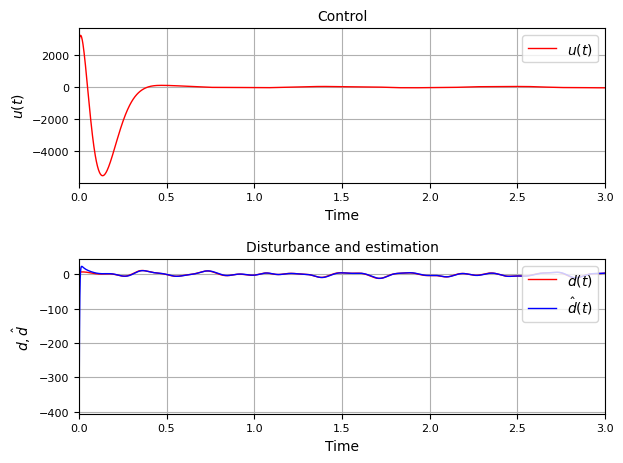

In [98]:

# Simulation
total_time = 3.0
total_steps = int(total_time*500)
step_time = total_time / total_steps

# Initial conditions
x = [5.0, -2.0]
x1_max = 20.0
x2_max = 10.0
x = [np.random.uniform(-x1_max, x1_max), np.random.uniform(-x2_max, x2_max)]

# Control parameters
parameters = {'t_s': 1.0, 'step_time': step_time,  'dot_d_max': 5.0, 
              'e_min': 0.05, 's_min': 0.05, 'w_min': 0.05, 'd_0':10.0,
              'z_min': 0.25, 'z_lim': 1.0, 'mu': 2.1, 
              'd_freq': 7.0, 'd_type': 1, 'r_freq': 2.0, 'kappa_z': 1.05}


data = simulate(total_steps, step_time, x, parameters)
print('total_steps=', total_steps, ' parameters=', parameters)

# Compute settling time
time_data = data[0,:]
x1_data = data[1,:]
r1_data = data[10,:] 
settling_time = compute_settling_time(x1_data, r1_data, time_data, parameters['e_min'])
u_max = np.max(np.abs(data[3,:]))
norm_x = np.linalg.norm(x)
print('settling_time=', settling_time, ' u_max=', u_max ,' norm_x=', norm_x , ' u_max/norm_x=', u_max/np.log(norm_x), ' settling_time/norm_x=', settling_time/np.log(norm_x), ' x=', x)

# Plot data 
plot(data, total_time, save_pdf = False)
